In [1]:
import pandas as pd
import numpy as np
import datetime
from FinancialMachineLearning.barsampling.core import *
import matplotlib.pyplot as plt
import dictances
from scipy.stats import shapiro
from scipy.stats import kstest
import seaborn as sns

D:\ANACONDA\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from FinancialMachineLearning.feature_importance.importance import (
    mean_decrease_impurity,
    mean_decrease_accuracy,
    single_feature_importance,
    plot_feature_importance
)
from FinancialMachineLearning.feature_importance.orthogonal import get_orthogonal_features
from FinancialMachineLearning.machine_learning.cross_validation import PurgedKFold, ml_cross_val_score
from FinancialMachineLearning.multiprocess.multiprocess import process_jobs

In [3]:
def check_norm(dist):

    if len(dist)<=2000:
        result=shapiro(dist)

    else :
        result=kstest(dist , 'norm')
    
    print(result.pvalue)

In [8]:
df

,date,time,open,high,low,close,volume,Ticker
0,20211229,1106,14800,14800,14800,14800,21,A000020
1,20211229,1403,14750,14750,14750,14750,3,A000020
2,20211229,1404,14700,14750,14700,14750,5,A000020
3,20211229,1405,14700,14750,14700,14700,1291,A000020
4,20211229,1406,14750,14750,14750,14750,4,A000020
...,...,...,...,...,...,...,...,...
136995,20231108,924,9810,9820,9810,9820,123,A000020
136996,20231108,923,9820,9820,9820,9820,8,A000020
136997,20231108,922,9830,9830,9830,9830,80,A000020
136998,20231108,941,9810,9810,9810,9810,241,A000020


Reading data in batches:
Batch number: 0
Returning bars 

0.035834167152643204


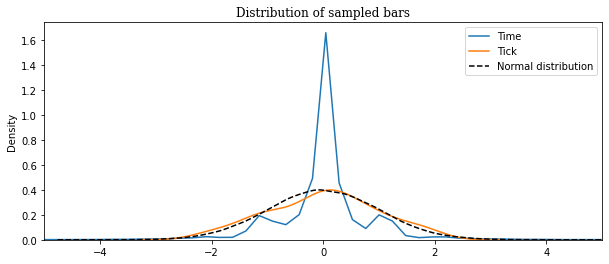

344


In [4]:
df=pd.read_csv("./KOSPI_1min/kor1min_data0.csv", index_col=0)
df=df[df.Ticker=='A000020']
df=df.sort_values('date', ascending=True)
df.reset_index(drop=True, inplace=True)

bar = StandardBarFeatures(file_path_or_df = df)
dollar = bar.dollar_bar(threshold = int(np.mean(df.close*df.volume))*1000 )

dollar_return = np.log(dollar['close']).diff().dropna()
dollar_standard = (dollar_return - dollar_return.mean()) / dollar_return.std()

check_norm(dollar_standard)

fig, ax = plt.subplots(figsize = (10,4))

time_returns = np.log(df['close']).diff().dropna()
time_standard = (time_returns - time_returns.mean()) / time_returns.std()

sns.kdeplot(time_standard.values, label = "Time", ax = ax)  
sns.kdeplot(dollar_standard.values, label = "Tick", ax = ax)
sns.kdeplot(np.random.normal(size=100000), label = "Normal distribution", 
            color = 'black', linestyle = "--", ax = ax)

plt.legend()
plt.grid(False)
plt.xlim(-5, 5)
plt.title('Distribution of sampled bars', fontfamily = 'Serif', fontsize = 12)
plt.show()
print(len(dollar))

In [9]:
tick

,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value,...,label,mfi,obv,rsi,vwap,tsi,meta,spread,lambda,vpin
37,20220222,11937,1142.0,1530.0,901.0,1126.0,4172350,893400,327,4.954299e+09,...,0,55.164443,16809800,48.873889,1189.669648,-17.071628,0,0.514386,0.000013,1.000393
38,20220223,12263,1124.0,1530.0,901.0,1143.0,4162650,956100,326,4.957347e+09,...,0,60.247679,20972450,49.516582,1188.519152,-15.722718,0,0.514386,0.000013,1.003349
39,20220224,12600,1142.0,1530.0,901.0,1028.0,4196650,958450,337,4.953505e+09,...,0,55.219549,16775800,45.448364,1184.765178,-15.870824,0,0.514386,0.000014,0.998706
40,20220228,12933,1047.0,1530.0,901.0,1325.0,4124650,1054600,333,4.950348e+09,...,1,60.435569,20900450,55.408037,1186.278786,-11.532692,1,0.514386,0.000017,1.006701
41,20220228,13262,1347.0,1530.0,901.0,1107.0,4140100,831300,329,4.954124e+09,...,0,60.511542,16760350,48.558254,1184.468635,-10.660787,0,0.514386,0.000020,1.004633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,20231027,134918,1102.0,1530.0,901.0,1452.0,4071890,776190,430,4.953774e+09,...,1,61.783258,115389960,52.504217,1211.788849,0.328941,1,0.517483,0.000067,1.018921
340,20231030,135349,1451.0,1530.0,901.0,1149.0,4138830,1939670,431,4.951925e+09,...,0,56.681463,111251130,49.260111,1208.619393,-0.028295,0,0.517483,0.000066,1.003729
341,20231101,135776,1151.0,1530.0,901.0,1330.0,4135500,900350,427,4.949941e+09,...,0,61.545298,115386630,51.157730,1213.807739,0.489576,0,0.517483,0.000064,0.999851
342,20231103,136217,1329.0,1530.0,901.0,1300.0,4235860,1894040,441,4.956160e+09,...,0,56.470042,111150770,50.826091,1218.263419,0.769266,0,0.517483,0.000064,0.983550


Reading data in batches:
Batch number: 0
Returning bars 

Reading data in batches:
Batch number: 0
Returning bars 

Accuracy: 0.9516129032258065


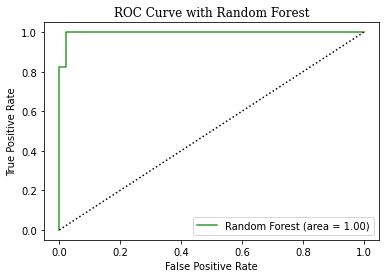

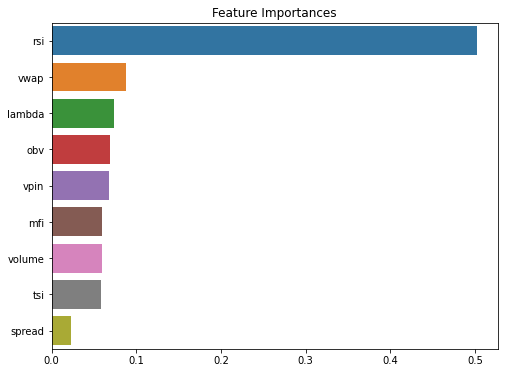

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        45
           1       1.00      0.82      0.90        17

    accuracy                           0.95        62
   macro avg       0.97      0.91      0.94        62
weighted avg       0.95      0.95      0.95        62



In [7]:
tick = bar.dollar_bar(threshold = int(np.mean(df.close*df.volume))*1000 )

# 볼린저밴드 전략 구현
from ta.volatility import BollingerBands
from ta.volume import money_flow_index, on_balance_volume
from ta.momentum import rsi
from ta.volume import volume_weighted_average_price
from ta.momentum import tsi

bollinger_result=BollingerBands(close = tick["close"], window = 20, window_dev = 1.2)

tick['boll_hband']=np.array(bollinger_result.bollinger_hband_indicator()).astype(int)
tick['boll_lband']=np.array(bollinger_result.bollinger_lband_indicator())

label=[]

for indexs in tick.index:
    if tick.loc[indexs, 'boll_hband']==1:
        label.append(1)
    elif tick.loc[indexs, 'boll_lband']==1:
        label.append(-1)
    else:
        label.append(0)
        
tick['label']=label

# 기타 기술적 지표 계산

tick['mfi']=money_flow_index(high = tick.high, 
                           low = tick.low,
                           close = tick.close, 
                           volume = tick.volume,
                           window = 20)

tick['obv']=on_balance_volume(close=tick.close,
                           volume=tick.volume,
                           )

tick['rsi']=rsi(close=tick.close, window=20)

tick['vwap']=volume_weighted_average_price(high=tick.high,
                                        low=tick.low,
                                        close=tick.close,
                                        volume=tick.volume,
                                        window=20)
tick['tsi']=tsi(close=tick.close,
             window_fast=13,
             window_slow=25)

# meta labling
meta=[]
for data in tick.label:
    if data==1:
        meta.append(1)
    elif data==-1:
        meta.append(1)
    else:
        meta.append(0)
tick['meta']=meta

# 시장 미시구조 변수 산출
from FinancialMachineLearning.features.microstructure import *

corwin_schultz = CorwinSchultz(tick['high'], tick['low'])
spread = corwin_schultz.corwin_schultz_estimator(window = 20)

lambda_feature = BarbasedLambda(close = tick['close'],
                                volume = tick['volume'],
                                dollar_volume = tick.close * tick.volume)
kyle_lambda = lambda_feature.kyle()

tick['spread']=spread
tick['lambda']=kyle_lambda

data=tick[['date_time','close', 'volume']]
data.columns=['date_time','price','volume']
data.to_csv("./tick_bar.csv", index=False)

from FinancialMachineLearning.barsampling.bar_feature import BarFeature

def buy_volume(df):
    tick_signs = tick_rule(df['price'])
    return (df['volume'] * (tick_signs > 0)).sum()

def sell_volume(df):
    tick_signs = tick_rule(df['price'])
    return (df['volume'] * (tick_signs < 0)).sum()
    
buy_volume_feature = BarFeature(name='buy_volume', function=buy_volume)
sell_volume_feature = BarFeature(name='sell_volume', function=sell_volume)
bars = vpin_volume_bars('./tick_bar.csv', additional_features = [buy_volume_feature, sell_volume_feature])
vol_thres = 10000
vpin_series = vpin(bars['volume'], bars['buy_volume'], window = 5)

tick['vpin']=vpin_series

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
from sklearn.metrics import auc

tick=tick.dropna()

X=tick[['spread', 'lambda', 'mfi', 'obv', 'rsi', 'vwap', 'tsi', 'volume', 'vpin']]
y=tick['meta']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=False)

tree = RandomForestClassifier(criterion = 'entropy', random_state = 42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_tree)
print(f'Accuracy: {accuracy}')

y_prob = tree.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Random Forest (area = {:.2f})'.format(roc_auc), color = 'green', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Random Forest', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

import seaborn as sns 
feature_name=X_train.columns
ser = pd.Series(tree.feature_importances_, index=feature_name)
ser=ser.sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ser, y=ser.index)
plt.show()

print(classification_report(y_test, y_pred_tree))

In [6]:
def feature_importances(X, cont, method, allow_masking_effects=False, n_splits=10):
    clf = RandomForestClassifier(
        criterion='entropy', class_weight='balanced_subsample', min_weight_fraction_leaf=0.0, n_estimators=500, 
        max_features=1.0, oob_score=True, n_jobs=-1
    )

    fit = clf.fit(X, cont['meta'])
    oob_score = fit.oob_score_

    cv_gen = PurgedKFold(n_splits=n_splits, samples_info_sets=pd.Series(cont.index))
    oos_score = ml_cross_val_score(clf, X, cont['meta'], cv_gen=cv_gen, scoring=accuracy_score).mean()

    if method == 'MDI':
        imp = mean_decrease_impurity(fit, X.columns)
    elif method == 'MDA':
        imp = mean_decrease_accuracy(clf, X, cont['meta'], cv_gen, scoring=accuracy_score)
    elif method == 'SFI':
        imp = single_feature_importance(clf, X, cont['meta'], cv_gen, scoring=accuracy_score)
    
    return imp, oob_score, oos_score


def test_data_func(X, cont, run='', allow_masking_effects=False, methods=['MDI', 'MDA', 'SFI']):
    feature_imp, oob_score, oos_score = feature_importances(X, cont, methods, allow_masking_effects)
    plot_feature_importance(
        feature_imp, oob_score=oob_score, oos_score=oos_score,
        save_fig = False
    )

    
test_data_func(X, tick, methods='MDA')

KeyboardInterrupt: 